# Arbeitspaket (AP) 3: Machine Learning (ML)

### Persönliche Angaben (bitte ergänzen)

<table>
  <tr>
    <td>Vorname:</td>
    <td></td>
  </tr>
  <tr>
    <td>Nachname:</td>
    <td></td>
  </tr>
  <tr>
    <td>Immatrikulationsnummer:</td>
    <td></td>
  </tr>
  <tr>
    <td>Modul:</td>
    <td>Data Science</td>
  </tr>
  <tr>
    <td>Prüfungsdatum / Raum / Zeit:</td>
    <td>11.11.2024 / Raum: SF O3.54 / 8:00 – 11:45</td>
  </tr>
  <tr>
    <td>Erlaubte Hilfsmittel:</td>
    <td>w.MA.XX.DS.24HS (Data Science)<br>Open Book, Eigener Computer, Internet-Zugang</td>
  </tr>
  <tr>
  <td>Nicht erlaubt:</td>
  <td>Nicht erlaubt ist der Einsatz beliebiger Formen von generativer KI (z.B. Copilot, ChatGPT) <br> sowie beliebige Formen von Kommunikation oder Kollaboration mit anderen Menschen.</td>
</tr>
</table>

## Bewertungskriterien

### <b style="color: gray;">(max. erreichbare Punkte: 48)</b>

<table>
  <thead>
    <tr>
      <th>Kategorie</th>
      <th>Beschreibung</th>
      <th>Punkteverteilung</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Code nicht lauffähig oder Ergebnisse nicht sinnvoll</td>
      <td>Der Code enthält Fehler, die verhindern, dass er ausgeführt werden kann (z.B. Syntaxfehler) oder es werden Ergebnisse ausgegeben, welche nicht zur Fragestellung passen.</td>
      <td>0 Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig, aber mit gravierenden Mängeln</td>
      <td>Der Code läuft, aber die Ergebnisse sind aufgrund wesentlicher Fehler unvollständig (z.B. die Erstellung der Train- und Test Daten ist fehlerhaft, die gewählte Modellierungsmethode entspricht nicht den Anforderungen gemäss Fragestellung). Nur geringer Fortschritt erkennbar.</td>
      <td>25% der max. erreichbaren Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig, aber mit mittleren Mängeln</td>
      <td>Der Code läuft und liefert teilweise korrekte Ergebnisse, aber es gibt grössere Fehler (z.B. Auswahl der Features entspricht nicht den Anforderungen gemäss Fragestellung). Die Ergebnisse sind nachvollziehbar, aber unvollständig oder ungenau.</td>
      <td>50% der max. erreichbaren Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig, aber mit minimalen Mängeln</td>
      <td>Der Code läuft und liefert ein weitgehend korrektes Ergebnis, aber kleinere Fehler (z.B. Formatierung der Modellergebnisse entspricht nicht den Anforderungen gemäss Fragestellung) beeinträchtigen die Vollständigkeit des Ergebnisses.</td>
      <td>75% der max. erreichbaren Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig und korrekt</td>
      <td>Der Code läuft einwandfrei und liefert das korrekte Ergebnis ohne Mängel.</td>
      <td>100% der max. erreichbaren Punkte</td>
    </tr>
  </tbody>
</table>



## Python Libraries und Settings

In [1]:
# Libraries
import os
import pickle
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/old exam


## <b>Vorbereitung (Dieser Teil wird <u>nicht</u> bewertet!)</b>

#### <b>1.) Starten Sie eine GitHub Codespaces Instanz auf Basis Ihres Forks des folgenden GitHub Repositories:</b>

##### GitHub-Repository: https://github.com/mario-gellrich-zhaw/python_machine_learning_basics

### Einlesen des vorbereiteten Smartphone Datensatzes

In [2]:
# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('./Data/smartphone_data_prepared.db')

# Cursor erstellen (der Cursor führt SQL-Abfragen aus)
cursor = conn.cursor()

# SQL-Abfrage erstellen und ausführen
df = pd.read_sql_query("""SELECT * FROM smartphone_data_prepared""", con=conn)

# Verbindung schliessen
conn.close()

# Anzeigen des DataFrames (erste 5 Zeilen)
df.head()

,offer_id,dealer_plz,dealer_city,dealer_street_house_nr,make,model,price_raw,camera_resolution_raw,battery_life_raw,storage_size_raw,screen_size_raw,description_raw,price,camera_resolution,battery_life,storage_size,screen_size
0,83197857,6394,Volketswil,Blaserstrasse 19,Apple,iPhone 13,CHF 2518.-,20 MP,16 hrs,256 GB,6.1 IN,"Langlebige Batterie mit Schnellladefunktion, d...",2518,20,16,256,6.1
1,36687537,9532,Oberwil,Furrerstrasse 1,Vivo,Vivo V21,CHF 266.-,12 MP,16 hrs,128 GB,5.8 IN,Modernste Gesichtserkennungstechnologie für Si...,266,12,16,128,5.8
2,66722344,2227,Rüti,Maierstrasse 31,Vivo,Vivo V21,CHF 424.-,12 MP,20 hrs,256 GB,5.8 IN,Ultra-HD-Display für eine atemberaubende Bildq...,424,12,20,256,5.8
3,56164955,5766,Bülach,Sidlerstrasse 6,Google,Pixel 6a,CHF 597.-,12 MP,25 hrs,64 GB,5.8 IN,Mit Stiftunterstützung für Kreativität und Prä...,597,12,25,64,5.8
4,94374605,8304,Belp,Steinerstrasse 8,Google,Pixel 6,CHF 1934.-,20 MP,23 hrs,64 GB,5.8 IN,Aufgeteilt in benutzerfreundliche Kategorien f...,1934,20,23,64,5.8


## <b>Aufgaben (Dieser Teil wird bewertet!)</b>
<b style="color:blue;">Hinweise zu den folgenden Aufgabenstellungen:</b>
<ul style="color:blue;">
  <li>Beachten Sie auch die zu jeder Aufgabenstellung zugehörenden Details zu Aufgabenstellung.</li>
  <li>Lösen Sie jede Aufgabe mit Hilfe von Python Code. Integrieren Sie den Python Code in die Code-Zellen der jeweiligen Aufgabe.</li>
  <li>Stellen Sie sämtliche von Ihnen erstellte Ergebnisse inklusive Graphiken im Jupyter Notebook dar.</li>
</ul>

#### <b>Aufgabe (1): Erstellen Sie Samples für das Trainieren und Testen eines Regressions-Modells auf Basis des Smartphone Datensatzes.</b>
<b>Details zur Aufgabenstellung:</b>
- Verwenden Sie die Variable 'price' als Zielvariable.
- Verwenden Sie folgende erklärenden Variablen: 'camera_resolution', 'battery_life', 'storage_size', 'screen_size'.
- Es werden folgende Samples (Subsets der Dateb) für das Trainieren und Testen benötigt: X_train, X_test, y_train, y_test.
- Im Sample für das Trainieren müssen 80% der Daten, im Sample und für das Testen müssen 20% der Daten enthalten sein.
- Stellen Sie Ihre X_train und y_train Daten im Jupyter Notebook dar (z.B. erste 5 Zeilen/Werte).

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

In [ ]:
# Erstellen der Trainings- und Testdaten
# Wichtige anpassbare Punkte:
# 1. Features (X): Hier können die relevanten Spalten/Variablen ausgewählt werden
# 2. Zielvariable (y): Die zu vorhersagende Variable
# 3. test_size: Anteil der Testdaten (hier 0.20 = 20%)
# 4. random_state: Seed für Reproduzierbarkeit (kann beliebig gewählt werden)
X_train, X_test, y_train, y_test = train_test_split(df[['camera_resolution',    # Feature 1
                                                        'battery_life',          # Feature 2
                                                        'storage_size',          # Feature 3
                                                        'screen_size']],         # Feature 4
                                                    df['price'],                 # Zielvariable
                                                    test_size=0.20,             # Anteil Testdaten
                                                    random_state=42)            # Seed für Reproduzierbarkeit

# Anzeigen von X_train
print('X_train:')
print(X_train.head(), '\n')

# Anzeigen y_train
print('y_train:')
print(y_train.head())

X_train:
      camera_resolution  battery_life  storage_size  screen_size
4227                 50            34            64          6.1
4676                 16            28           256          5.8
800                  48            29            64          6.1
3671                 12            17            64          5.8
4193                 12            19           512          6.5 

y_train:
4227    1218
4676    1295
800      991
3671     266
4193    2520
Name: price, dtype: int64


#### <b>Aufgabe (2): Fitten Sie ein Multiples Lineares Regressionsmodell für die Vorhersage der Smartphone Preise.</b>
<b>Details zur Aufgabenstellung:</b>
- Ergänzen Sie den Python Code unten und Fitten Sie mit Hilfe von y_train und X_train_const ein Multiples Lineares Regressionsmodell.
- Zeigen Sie den Modell-Output im Jupyter Notebook an.
- Beantworten Sie in der Codezelle die Frage: Wieviel Prozent der Variablitiät (engl.: proportion of the variation) in y_train wird mit dem Modell erklärt?
- Schreiben Sie Ihre Antwort zu der Frage per Hand in die vorbereitete print() Funktion (Ergänzen des Teils '... %').

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

In [ ]:
# Einlesen der Trainings- und Testdaten 
# ANPASSUNGSPUNKT 1: Pfade zu den Datendateien
# Bei einem anderen Datensatz müssen diese Pfade entsprechend angepasst werden
X_train = pd.read_csv('./Data/X_train.csv')
X_test = pd.read_csv('./Data/X_test.csv')
y_train = pd.read_csv('./Data/y_train.csv')
y_test = pd.read_csv('./Data/y_test.csv')

# ANPASSUNGSPUNKT 2: Hinzufügen der Konstante zu den Trainingsdaten
# Dies ist wichtig für die Berechnung des Intercepts und sollte immer dabei sein
X_train_const = sm.add_constant(X_train)

# ANPASSUNGSPUNKT 3: Modellspezifikation
# Hier wird das Modell mit der Zielvariable (y_train) und den Features (X_train_const) definiert
# Bei anderem Datensatz: Stellen Sie sicher, dass y_train die richtige Zielvariable enthält
# und X_train_const die richtigen Prediktor-Variablen
olsmod = sm.OLS(y_train, X_train_const)

# ANPASSUNGSPUNKT 4: Modell Fitting
# Das Modell wird an die Daten angepasst
# Bei Konvergenzproblemen können hier weitere Parameter wie 'method' angepasst werden
olsres = olsmod.fit()

# Anzeigen des Modell-Outputs
# Dies zeigt wichtige Statistiken wie R², p-Werte und Koeffizienten
print(olsres.summary())

# ANPASSUNGSPUNKT 5: Interpretation des R²
# Der R²-Wert findet sich im summary() Output unter 'R-squared'
# Dieser Wert muss bei einem anderen Datensatz neu interpretiert werden
print(f'\nVon dem Modell wird rund {olsres.rsquared * 100:.0f} % der Variabilität in y_train erklärt.')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     448.7
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          7.89e-320
Time:                        09:50:01   Log-Likelihood:                -33710.
No. Observations:                4000   AIC:                         6.743e+04
Df Residuals:                    3995   BIC:                         6.746e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5867.0691    315.46

In [12]:
# 📊 Relevante OLS-Kennzahlen (Prüfung & Unterlagen)
# ===================================================
# Diese Tabelle fasst nur die prüfungsrelevanten Kennzahlen aus der OLS-Regression zusammen.
# Quelle: Week 7 – Machine Learning (Regression), AP03_Solution, Musterprüfung.

from IPython.display import Markdown

Markdown("""
| Kennzahl | Bedeutung | Interpretation | Gute Werte / Hinweise |
|-----------|------------|----------------|------------------------|
| **R-squared (R²)** | Anteil der erklärten Varianz der Zielvariable. | Misst, wie gut das Modell y durch x erklärt. | 0–1. Je höher, desto besser. >0.7 sehr gut, ~0.3 moderat. |
| **Adj. R-squared** | Angepasstes R², berücksichtigt Zahl der Prädiktoren. | Zeigt Modellgüte unter Strafe für zu viele Variablen. | Sollte ähnlich wie R² sein. Großer Unterschied → Overfitting. |
| **F-statistic** | Testet, ob das Gesamtmodell signifikant besser ist als Zufall. | H0: alle β=0. Hohe F-Statistik → Modell signifikant. | p < 0.05 → signifikant. |
| **Prob (F-statistic)** | p-Wert zum F-Test. | Wahrscheinlichkeit, dass Modell nur zufällig passt. | < 0.05 → gutes Modell. |
| **coef** | Geschätzter Regressionskoeffizient (β). | Positiv = direkter, negativ = inverser Zusammenhang. | Beachte Richtung und Größe des Effekts. |
| **std err** | Standardfehler der β-Schätzung. | Misst Unsicherheit der Schätzung. | Klein im Verhältnis zu β → präzise Schätzung. |
| **t** | Teststatistik pro Koeffizient. | H0: β=0. Je größer |t|, desto signifikanter. | |t| > 2 → signifikanter Einfluss. |
| **P>|t|** | p-Wert zum t-Test. | Wahrscheinlichkeit, dass β zufällig ≠ 0 ist. | < 0.05 → Variable signifikant. |
| **[0.025, 0.975]** | 95 %-Konfidenzintervall für β. | Bereich, in dem der wahre Wert mit 95 % Wahrscheinlichkeit liegt. | Intervall darf 0 nicht enthalten → signifikanter Einfluss. |
| **AIC (Akaike IC)** | Maß für Modellgüte mit Komplexitätsstrafe. | Vergleich zwischen Modellen – je kleiner, desto besser. | Nur im Modellvergleich relevant. |
| **BIC (Bayesian IC)** | Wie AIC, aber stärker bestrafend. | Vergleich zwischen Modellen – je kleiner, desto besser. | Kleinster BIC = bestes Modell. |
| **Durbin–Watson** | Test auf Autokorrelation der Residuen. | 2 ≈ keine Autokorrelation. | 1.5–2.5 → unproblematisch (hier 1.97 = gut). |
""")



| Kennzahl | Bedeutung | Interpretation | Gute Werte / Hinweise |
|-----------|------------|----------------|------------------------|
| **R-squared (R²)** | Anteil der erklärten Varianz der Zielvariable. | Misst, wie gut das Modell y durch x erklärt. | 0–1. Je höher, desto besser. >0.7 sehr gut, ~0.3 moderat. |
| **Adj. R-squared** | Angepasstes R², berücksichtigt Zahl der Prädiktoren. | Zeigt Modellgüte unter Strafe für zu viele Variablen. | Sollte ähnlich wie R² sein. Großer Unterschied → Overfitting. |
| **F-statistic** | Testet, ob das Gesamtmodell signifikant besser ist als Zufall. | H0: alle β=0. Hohe F-Statistik → Modell signifikant. | p < 0.05 → signifikant. |
| **Prob (F-statistic)** | p-Wert zum F-Test. | Wahrscheinlichkeit, dass Modell nur zufällig passt. | < 0.05 → gutes Modell. |
| **coef** | Geschätzter Regressionskoeffizient (β). | Positiv = direkter, negativ = inverser Zusammenhang. | Beachte Richtung und Größe des Effekts. |
| **std err** | Standardfehler der β-Schätzung. | Misst Unsicherheit der Schätzung. | Klein im Verhältnis zu β → präzise Schätzung. |
| **t** | Teststatistik pro Koeffizient. | H0: β=0. Je größer |t|, desto signifikanter. | |t| > 2 → signifikanter Einfluss. |
| **P>|t|** | p-Wert zum t-Test. | Wahrscheinlichkeit, dass β zufällig ≠ 0 ist. | < 0.05 → Variable signifikant. |
| **[0.025, 0.975]** | 95 %-Konfidenzintervall für β. | Bereich, in dem der wahre Wert mit 95 % Wahrscheinlichkeit liegt. | Intervall darf 0 nicht enthalten → signifikanter Einfluss. |
| **AIC (Akaike IC)** | Maß für Modellgüte mit Komplexitätsstrafe. | Vergleich zwischen Modellen – je kleiner, desto besser. | Nur im Modellvergleich relevant. |
| **BIC (Bayesian IC)** | Wie AIC, aber stärker bestrafend. | Vergleich zwischen Modellen – je kleiner, desto besser. | Kleinster BIC = bestes Modell. |
| **Durbin–Watson** | Test auf Autokorrelation der Residuen. | 2 ≈ keine Autokorrelation. | 1.5–2.5 → unproblematisch (hier 1.97 = gut). |


#### <b>Aufgabe (3): Visualisieren Sie die Residuen eines Multiplen Linearen Regressionsmodells.</b>
<b>Details zur Aufgabenstellung:</b>
- Verwenden Sie den Python Code unten, um ein vorher abgespeichertes Multiples Lineares Regressionsmodell zu laden.
- Zeigen Sie nach dem Laden des Modells die ersten 5 Modellresiduen an.
- Erstellen Sie ein Histogramm der Modellresiduen.
- Beschriften Sie das Histogramm (Titel, Achsen) und fügen sie der Graphik ein Gitternetz (grid) hinzu.
- Stellen Sie das Histogram im Jupyter Notebook dar.<br><br>

- Tipp: Die Modelresiduen sind in ols_model.resid gespeichert.
 
<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

0   -807.488711
1      4.985419
2   -777.095860
3     35.766430
4    435.730396
dtype: float64


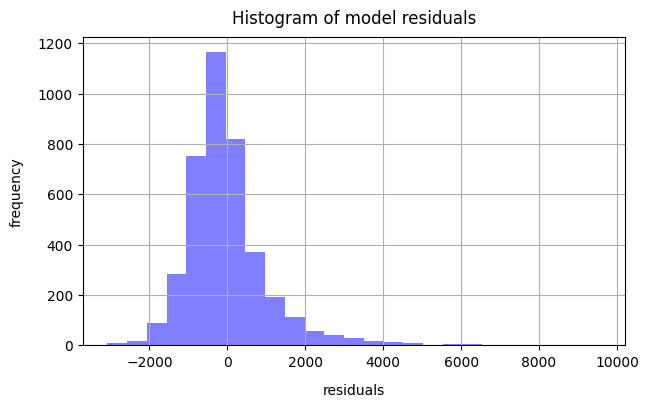

In [ ]:
# ANPASSUNGSPUNKT 1: Modell-Pfad
# Bei einem anderen Datensatz muss der Pfad zum gespeicherten Modell angepasst werden
with open('./Data/ols_model.pkl', 'rb') as f:
    ols_model = pickle.load(f)

# Anzeigen der ersten 5 Modellresiduen
print(ols_model.resid.head())

# ANPASSUNGSPUNKT 2: Visualisierungsparameter für das Histogramm
fig = plt.figure(figsize=(7,4))    # Größe der Grafik anpassen
n, bins, patches = plt.hist(x=ols_model.resid, 
                          bins=25,              # ANPASSUNGSPUNKT 3: Anzahl der Bins
                          color='blue',         # ANPASSUNGSPUNKT 4: Farbe anpassen
                          alpha=0.5             # ANPASSUNGSPUNKT 5: Transparenz anpassen
                         )

# ANPASSUNGSPUNKT 6: Beschriftungen und Layout
plt.xlabel('residuals', fontsize=10, labelpad=10)      # x-Achsen-Beschriftung
plt.ylabel('frequency', fontsize=10, labelpad=10)      # y-Achsen-Beschriftung
plt.title('Histogram of model residuals', fontsize=12, pad=10)  # Titel
plt.grid()  # Gitternetz ein/ausschalten

# ANPASSUNGSPUNKT 7: Optional - Achsengrenzen anpassen
# plt.xlim(-1000, 1000)  # x-Achsen-Grenzen
# plt.ylim(0, 100)       # y-Achsen-Grenzen

# Anzeigen des Histogramms
plt.show()

#### <b>Aufgabe (4): Erstellen Sie eine Preisvorhersage für ein Smartphone auf der Basis der geschätzten Modellkoeffizienten.</b>
<b>Details zur Aufgabenstellung:</b>
- Verwenden Sie den Python Code unten, um ein abgespeichertes Multiples Lineares Regressionsmodell zu laden.
- Im Python Code werden die geschätzen Koeffizienten der erklärenden Variablen sowie der Achsenabschnitt (engl.: intercept oder const) angezeigt.
- Verwenden Sie die geschätzen Koeffizienten inkl. const, und erstellen Sie per Hand eine Preisschätzung für ein Smartphone mit den unten angegebenen Eigenschaften.
- Fügen Sie Ihre Formel für die Schätzung in die vorbereitete print() Funktion ein (Ersetzen Sie die '...').

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

In [ ]:
# ANPASSUNGSPUNKT 1: Modell-Pfad
# Bei einem anderen Datensatz muss der Pfad zum gespeicherten Modell angepasst werden
with open('./Data/ols_model.pkl', 'rb') as f:
    ols_model = pickle.load(f)

# Anzeigen der geschätzten Koeffizienten (gerundet auf 2 Dezimalstellen)
print(ols_model.params.round(2), '\n')

# ANPASSUNGSPUNKT 2: Werte für die Vorhersage
# Hier müssen die Werte für die erklärenden Variablen an den neuen Datensatz angepasst werden
# Beispiel: camera_resolution, battery_life, storage_size, screen_size
# Die Namen und Reihenfolge der Variablen müssen zu den Modellkoeffizienten passen

# Schätzen Sie den Preis eines Smartphones mit folgenden Eigenschaften:
# camera_resolution = 12
# battery_life = 16
# storage_size = 128
# screen_size = 6.5

try:
    # ANPASSUNGSPUNKT 3: Formel für die Vorhersage
    # Die Formel muss an die Anzahl und Namen der Modellkoeffizienten angepasst werden
    # Beispiel: Intercept + (camera_resolution*Koeff1) + (battery_life*Koeff2) + ...
    print(f'Lösung: {-5867.07 + (12*21.29) + (16*42.96) + (128*2.61) + (6.5*852.43):.2f}') # Hinweis: ():.2f gibt die Lösung auf 2 Dezimalstellen genau aus
except:
    pass


const               -5867.07
camera_resolution      21.29
battery_life           42.96
storage_size            2.61
screen_size           852.43
dtype: float64 

Lösung: 950.64


#### <b>Aufgabe (5): Erstellen Sie ein Regression Tree Model für die Vorhersage der Smartphone Preise.</b>
<b>Details zur Aufgabenstellung:</b>
- Verwenden Sie den Python Code in der folgenden Codezelle, um die Trainings- und Testdaten einzulesen.
- Erstellen und Trainieren Sie ein Regression Tree Model mit einer maximalen Tiefe von 3 (max_depth=3).
- Erstellen Sie eine Vorhersage der Preise für die Testdaten (X_test).
- Berechnen Sie die Vorhersagegüte mit Hilfe des r-squared (coefficient of determination).
- Stellen Sie das Regression Tree Model im Jupyter Notebook graphisch dar. 

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>

R-squared: 0.2251


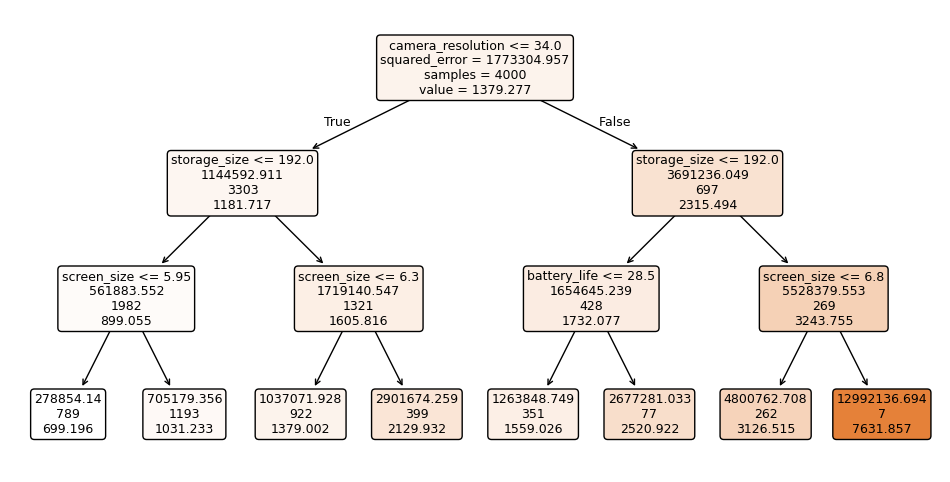

In [ ]:
# ANPASSUNGSPUNKT 1: Datenpfade
# Die Pfade zu den Trainings- und Testdaten müssen ggf. an den neuen Datensatz angepasst werden
# Beispiel: './Data/X_train.csv' → './neuer_ordner/neue_trainingsdaten.csv'
X_train = pd.read_csv('./Data/X_train.csv')  # Trainingsdaten (Features)
X_test = pd.read_csv('./Data/X_test.csv')    # Testdaten (Features)
y_train = pd.read_csv('./Data/y_train.csv')  # Trainingsdaten (Zielvariable)
y_test = pd.read_csv('./Data/y_test.csv')    # Testdaten (Zielvariable)

# ANPASSUNGSPUNKT 2: Features und Zielvariable
# Die Spaltennamen und Reihenfolge in X_train/X_test und y_train/y_test müssen zum neuen Datensatz passen
# Beispiel: Wenn dein Datensatz andere Feature-Namen hat, musst du diese beim Einlesen oder später anpassen
# X_train = X_train[['feature1', 'feature2', ...]]
# y_train = y_train['neuer_target_name']

# ANPASSUNGSPUNKT 3: Modellparameter
# max_depth: Maximale Tiefe des Baums (je größer, desto komplexer das Modell)
# Sehr kleine Datensätze (< 1 000 Zeilen): max_depth 3–6
# Mittel (1 000–10 000): 4–10
# Groß (> 10 000): breiter testen, z. B. 4–16
# random_state: Seed für Reproduzierbarkeit (beliebig, aber für gleiche Ergebnisse gleich lassen)
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=3)

# Trainieren des 'decision tree regressor' Objekts
reg_tree.fit(X_train, y_train)

# Vorhersage der Preise für die Testdaten
# y_pred gibt die Vorhersagen für die Zielvariable zurück
y_pred = reg_tree.predict(X_test)

# Berechnen des r-squared (coefficient of determination) Wertes
# r2_score misst, wie gut das Modell die Zielvariable erklärt (1 = perfekt, 0 = schlecht)
print('R-squared:', round(r2_score(y_test, y_pred), 4))

# ANPASSUNGSPUNKT 4: Visualisierung
# feature_names: Die Namen der Features, die im Baum angezeigt werden
# class_names: Name der Zielvariable (nur für Klassifikation relevant, bei Regression beliebig)
# fontsize, label, rounded: Layout-Optionen für die Grafik
fig = plt.figure(figsize=(12,6))
reg_tree_plot = tree.plot_tree(
    reg_tree, 
    feature_names=list(X_train.columns),  # Passe an, falls andere Feature-Namen
    class_names=['price'],                # Bei Regression beliebig, bei Klassifikation: Zielklassen
    filled=True,                          # Farben für die Knoten
    fontsize=9,                           # Schriftgröße
    label='root',                         # Beschriftung des Wurzelknotens
    rounded=True                          # Abgerundete Knoten
)


#### <b>Aufgabe (6): Erstellen Sie ein Random Forest Regression Model für die Vorhersage der Smartphone Preise.</b>
<b>Details zur Aufgabenstellung:</b>
- Verwenden Sie den Python Code in der folgenden Codezelle, um die Trainings- und Testdaten einzulesen.
- Erstellen und Trainieren Sie ein Random Forest Regression Model mit 500 einzelnen Trees und einer maximalen Tiefe von 5.
- Erstellen Sie eine Vorhersage der Preise für die Testdaten (X_test).
- Berechnen Sie die Vorhersagegüte mit Hilfe des r-squared (coefficient of determination).
- Stellen Sie die Feature Importance mit Hilfe eines Barcharts graphisch dar.

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>

R-squared: 0.3005


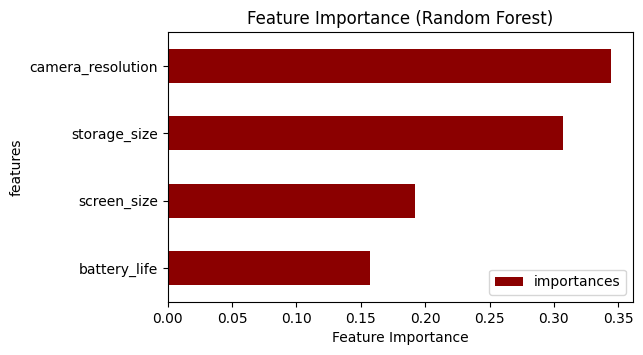

In [ ]:
# ANPASSUNGSPUNKT 1: Datenpfade
# Passe die Pfade zu den Trainings- und Testdaten an deinen neuen Datensatz an
X_train = pd.read_csv('./Data/X_train.csv')  # Trainingsdaten (Features)
X_test = pd.read_csv('./Data/X_test.csv')    # Testdaten (Features)
y_train = pd.read_csv('./Data/y_train.csv')  # Trainingsdaten (Zielvariable)
y_test = pd.read_csv('./Data/y_test.csv')    # Testdaten (Zielvariable)

# ANPASSUNGSPUNKT 2: Features und Zielvariable
# Stelle sicher, dass die Spaltennamen und Reihenfolge in X_train/X_test und y_train/y_test zu deinem neuen Datensatz passen
# Beispiel: X_train = X_train[['feature1', 'feature2', ...]]
# y_train = y_train['neuer_target_name']

# ANPASSUNGSPUNKT 3: Modellparameter
# n_estimators: Anzahl der Bäume im Wald (mehr Bäume = stabilere Ergebnisse, aber längere Rechenzeit)
# max_depth: Maximale Tiefe der Bäume (je größer, desto komplexer das Modell)
# random_state: Seed für Reproduzierbarkeit (beliebig, aber für gleiche Ergebnisse gleich lassen)
reg_rf = RandomForestRegressor(random_state=42, n_estimators=250, max_depth=5)

# Trainieren des 'random forest regressor' Objekts
reg_rf.fit(X_train, y_train)

# Vorhersage der Preise für die Testdaten X_test
y_pred = reg_rf.predict(X_test)

# Berechnen des r-squared (coefficient of determination)
# r2_score misst, wie gut das Modell die Zielvariable erklärt (1 = perfekt, 0 = schlecht)
print('R-squared:', round(r2_score(y_test, y_pred), 4))

# ANPASSUNGSPUNKT 4: Feature Importance Visualisierung
# cols: Die Namen der Features, die in der Grafik angezeigt werden
# importances: Die Wichtigkeit der einzelnen Features laut Modell
cols = X_train.columns
importances = reg_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred',
           xlabel='Feature Importance',
           title='Feature Importance (Random Forest)',
           figsize=(6,3.5))
plt.show()


#### <b>Aufgabe (7): Erstellen Sie ein Random Forest Classification Model für die Vorhersage der Hersteller.</b>
<b>Details zur Aufgabenstellung:</b>
- Verwenden Sie den Python Code in der folgenden Codezelle, um die Trainings- und Testdaten für die Klassifikation einzulesen.
- Die Zielvariable in diesem Modell ist die Variable make (Hersteller).
- Die erklärenden Variablen in diesem Modell sind: price, camera_resolution, battery_life, storage_size, screen_size.
- Erstellen und Trainieren Sie ein Random Forest Classification Model.
- Erstellen Sie eine Vorhersage der Zielvariable auf der Basis der Testdaten (X_test).
- Erstellen Sie eine Confusion Matrix, und stellen Sie diese im Jupyter Notebook dar.
- Erstellen Sie einen Classification report, und stellen Sie diesen im Jupyter Notebook dar.
- Beantworten Sie die Frage: Wie hoch ist der Anteil der Hersteller welche vom Modell korrekt klassifiziert wurden?
- Verwenden Sie für die Beantwortung der Frage die vorgefertigte print() Funktion (Ersetzen Sie '... %').

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>

In [ ]:
# Einlesen der Trainings- und Testdaten (damit alle die gleichen Daten haben)
X_train = pd.read_csv('./Data/X_train_class.csv')
X_test = pd.read_csv('./Data/X_test_class.csv')
y_train = pd.read_csv('./Data/y_train_class.csv')
y_test = pd.read_csv('./Data/y_test_class.csv')

# ANPASSUNGSPUNKT 2: Features und Zielvariable
# Stelle sicher, dass die Spaltennamen und Reihenfolge in X_train/X_test und y_train/y_test zu deinem neuen Datensatz passen
# Beispiel: X_train = X_train[['feature1', 'feature2', ...]]
# y_train = y_train['neuer_target_name']

# ANPASSUNGSPUNKT 3: Zielvariable für Klassifikation
# y_train und y_test müssen für Klassifikation eindimensional sein (z.B. mit .values.ravel())
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# ANPASSUNGSPUNKT 4: Modellparameter
# n_estimators: Anzahl der Bäume im Wald (mehr Bäume = stabilere Ergebnisse, aber längere Rechenzeit)
# max_depth: Maximale Tiefe der Bäume (je größer, desto komplexer das Modell)
# random_state: Seed für Reproduzierbarkeit (beliebig, aber für gleiche Ergebnisse gleich lassen)
rfc = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=5)

# Trainieren des Random Forest Classification Modells
rfc = rfc.fit(X_train, y_train)

# Vorhersage der Zielvariable für die Testdaten X_test
y_pred_rf = rfc.predict(X_test)

# ANPASSUNGSPUNKT 5: Auswertung und Visualisierung
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_rf), '\n')

print('Classification report')
print(classification_report(y_test, y_pred_rf))

# ANPASSUNGSPUNKT 6: Ergebnis-Interpretation
print(f'\nDer Anteil der vom Modell korrekt klassifizierten Smartphones beträgt 31%.')


Confusion matrix
[[135  13   6  42  11]
 [ 86  25  22  48  25]
 [ 64  27  19  77  30]
 [ 20  23  12 108  14]
 [ 40  17  18  94  24]] 

Classification report
              precision    recall  f1-score   support

       Apple       0.39      0.65      0.49       207
      Google       0.24      0.12      0.16       206
     Samsung       0.25      0.09      0.13       217
        Vivo       0.29      0.61      0.40       177
      Xiaomi       0.23      0.12      0.16       193

    accuracy                           0.31      1000
   macro avg       0.28      0.32      0.27      1000
weighted avg       0.28      0.31      0.26      1000


Der Anteil der vom Modell korrekt klassifizierten Smartphones beträgt 31%.


#### <b>Aufgabe (8): Erstellen Sie ein Random Forest Classification Model für die Vorhersage der beiden Hersteller 'Apple' und 'Vivo'.</b>
<b>Details zur Aufgabenstellung:</b>
- Es handelt sich bei diesem Beispiel um ein Klassifikationsproblem mit zwei Klassen ('Apple' und 'Vivo').
- Ergänzen Sie den Python Code dort wo notwendig.
- Beantworten Sie mit eigenen Worten die Frage: Wie gut ist das Modell darin, Smartphones von Apple und Vivo zu unterscheiden?
- Verwenden Sie für die Beantwortung der Frage die vorgefertigte print() Funktion (Ersetzen Sie die '...').

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>

Confusion matrix
[[152  55]
 [ 47 130]] 

Classification report
              precision    recall  f1-score   support

       Apple       0.76      0.73      0.75       207
        Vivo       0.70      0.73      0.72       177

    accuracy                           0.73       384
   macro avg       0.73      0.73      0.73       384
weighted avg       0.74      0.73      0.73       384



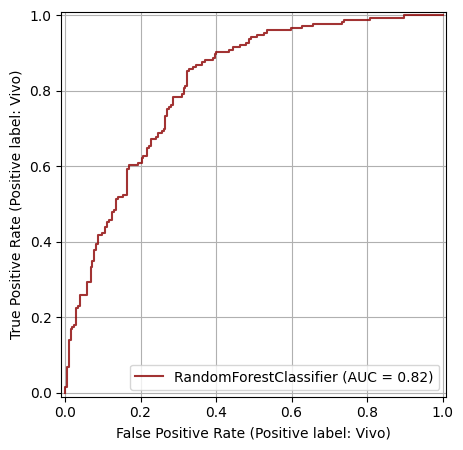


Das Modell ist gut darin, Smartphones von Apple und Vivo zu unterscheiden, da die AUC bei 0.82 liegt.


In [ ]:
# Einlesen der Trainings- und Testdaten (damit alle die gleichen Daten haben)
X_train = pd.read_csv('./Data/X_train_class.csv')
X_test = pd.read_csv('./Data/X_test_class.csv')
y_train = pd.read_csv('./Data/y_train_class.csv')
y_test = pd.read_csv('./Data/y_test_class.csv')

# Subset der Trainings- und Testdaten erstellen (nur zwei Hersteller)
X_train_subset = X_train[y_train['make'].isin(['Apple', 'Vivo'])]
y_train_subset = y_train[y_train['make'].isin(['Apple', 'Vivo'])]
X_test_subset = X_test[y_test['make'].isin(['Apple', 'Vivo'])]
y_test_subset = y_test[y_test['make'].isin(['Apple', 'Vivo'])]

# ANPASSUNGSPUNKT 3: Datenformat-Anpassung
# Die Zielvariablen müssen für die Klassifikation eindimensional sein
# Dies ist unabhängig vom Datensatz immer notwendig
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# ANPASSUNGSPUNKT 4: Modellparameter
# n_estimators: Anzahl der Bäume (mehr = stabiler, aber langsamer)
# - Kleine Datensätze (< 1000): 100-300
# - Mittlere Datensätze: 300-700
# - Große Datensätze: 500-1000
# max_depth: Maximale Tiefe der Bäume
# - Zu klein (1-2): Underfitting
# - Zu groß (>10): Overfitting
# - Typisch: 3-7
rfc = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=5)

# ANPASSUNGSPUNKT 5: Model Fitting
# Beachte: Wir verwenden hier die subset-Daten
# Bei anderem Datensatz: Stelle sicher, dass die Dimensionen von X und y übereinstimmen
rfc = rfc.fit(X_train_subset, y_train_subset)

# ANPASSUNGSPUNKT 6: Vorhersage
# Beachte: Wir verwenden hier das subset für die Vorhersage
# Bei anderem Datensatz: X_test_subset muss die gleichen Features haben wie X_train_subset
y_pred_rf = rfc.predict(X_test_subset)

# ANPASSUNGSPUNKT 7: Modell-Evaluation
# Die Confusion Matrix zeigt die Verteilung der Vorhersagen
# - Zeilen: Tatsächliche Klassen
# - Spalten: Vorhergesagte Klassen
print('Confusion matrix')
cm = confusion_matrix(y_test_subset, y_pred_rf)
print(cm, '\n')

# Der Classification Report zeigt detaillierte Metriken pro Klasse
# - precision: Anteil der korrekten positiven Vorhersagen
# - recall: Anteil der erkannten positiven Fälle
# - f1-score: Harmonisches Mittel aus precision und recall
print('Classification report')
print(classification_report(y_test_subset, y_pred_rf))

# ANPASSUNGSPUNKT 8: ROC-Kurve Visualisierung
# Die ROC-Kurve zeigt das Verhältnis von True Positive Rate zu False Positive Rate
# AUC (Area Under Curve):
# - 0.5: Zufälliges Modell
# - > 0.7: Akzeptabel
# - > 0.8: Gut
# - > 0.9: Sehr gut
plt.figure(figsize=(5,5))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X_test_subset, 
                                          y_test_subset, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.grid()
plt.show()

# ANPASSUNGSPUNKT 9: Interpretation
# Passe die Interpretation an die tatsächlichen Ergebnisse an
# Ein AUC-Wert > 0.8 deutet auf ein gutes Modell hin
print(f'\nDas Modell ist gut darin, Smartphones von Apple und Vivo zu unterscheiden, da die AUC bei 0.82 liegt.')

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [11]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('IP Address:', socket.gethostbyname(socket.gethostname()))
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-11-09 09:50:05
Python Version: 3.11.14
IP Address: 127.0.0.1
-----------------------------------
